### German Credit Analysis | A risk Perspective

Goals for this Project
Explore our data and detecting key patterns.
Develop a Neural Network to predict whether a loan will be of a good or bad risk.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
import missingno as msno
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

# Importing our data
df = pd.read_csv("german_credit_data.csv",index_col=0)

original_df = df.copy()
# df.columns = [col.replace(' ', '_').lower() for col in df.columns]

In [16]:
print(f'Dimensions: {df.shape}')

Dimensions: (1000, 10)


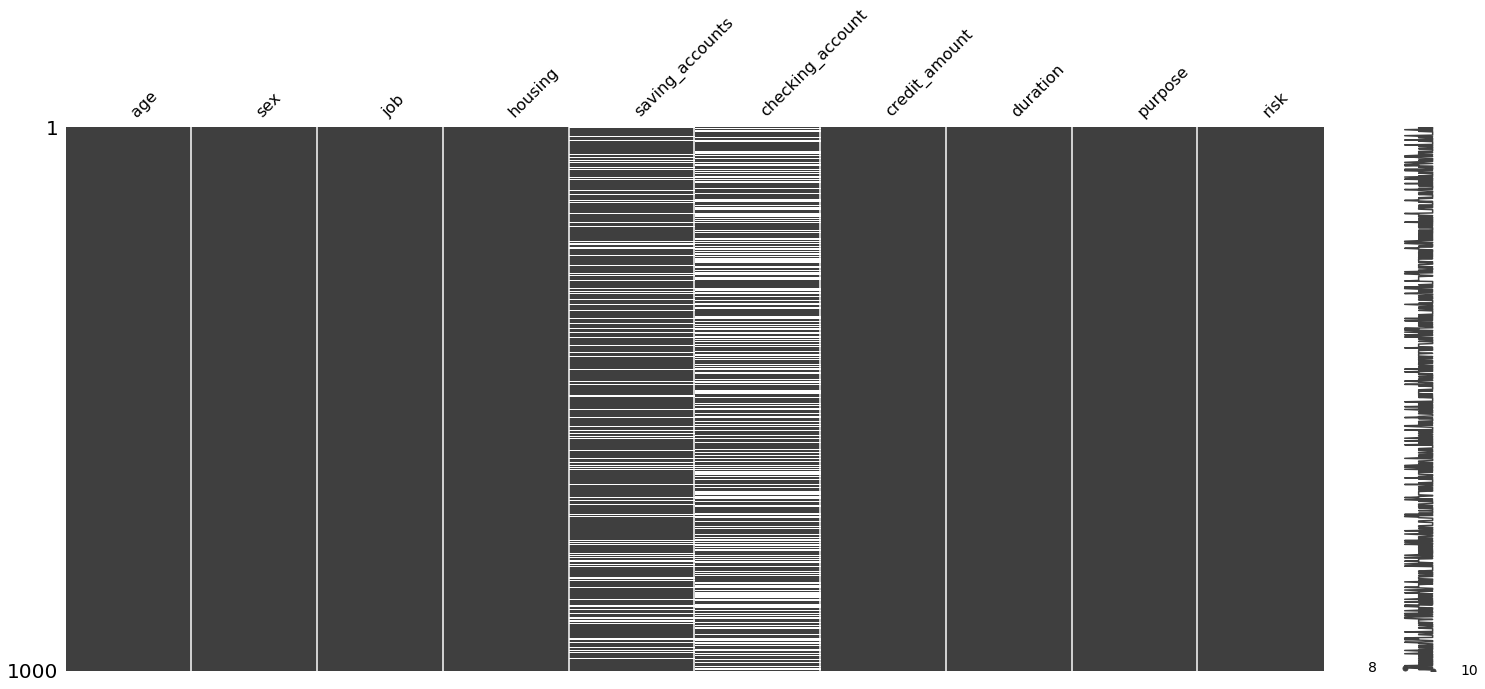

In [25]:
msno.matrix(df)

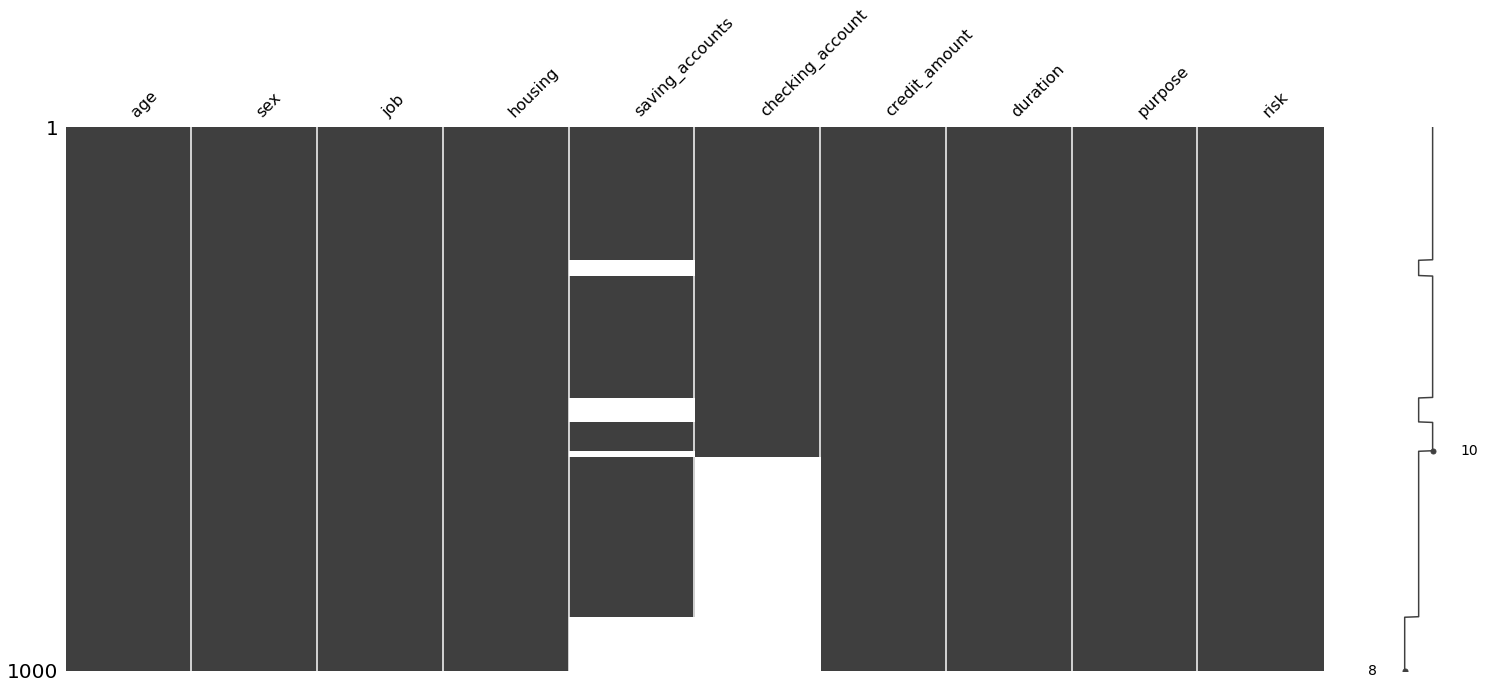

In [29]:
sorted = df.sort_values(['checking_account','saving_accounts'])
msno.matrix(sorted)


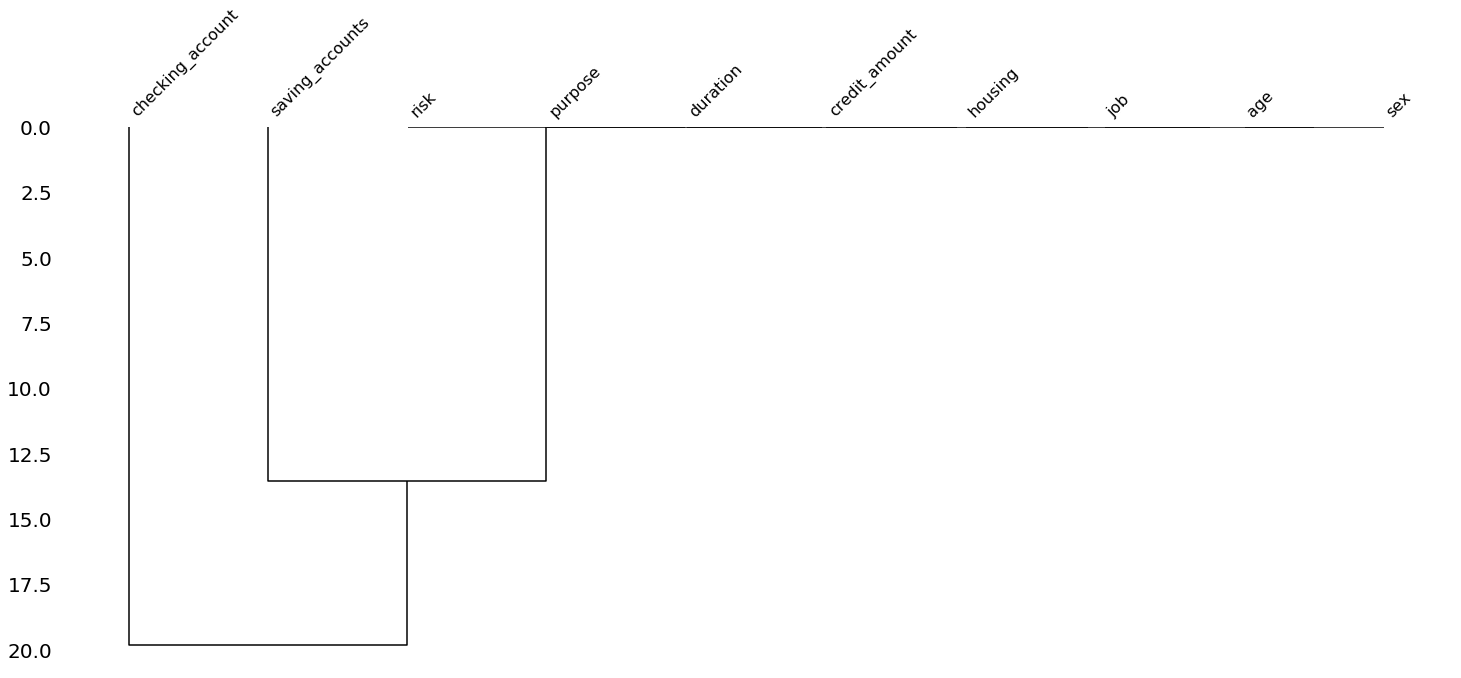

In [24]:
msno.dendrogram(df)

In [30]:
df.describe()

,age,job,credit_amount,duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


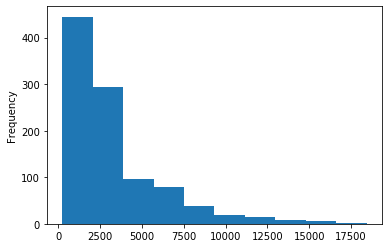

In [31]:
df.credit_amount.plot(kind='hist')

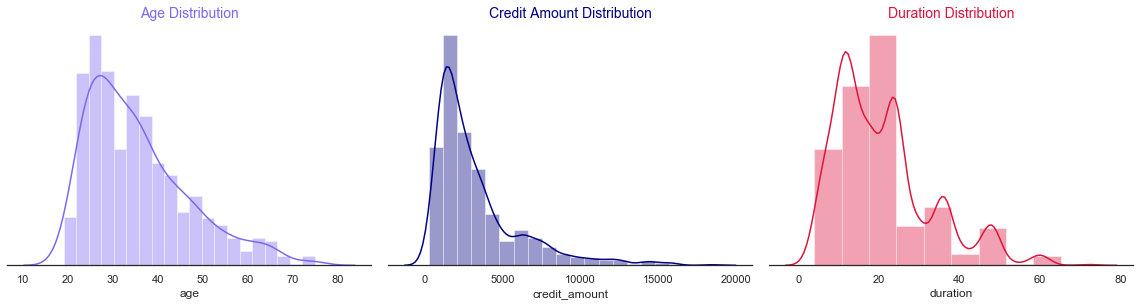

In [58]:
sns.set(style='white', palette='muted', color_codes=True)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
sns.despine(left=True)

sns.distplot(df['age'], bins=20, ax=axs[0], color='mediumslateblue')
axs[0].set_title('Age Distribution', size=14, color='mediumslateblue')
sns.distplot(df['credit_amount'], bins=20, ax=axs[1], color='navy')
axs[1].set_title('Credit Amount Distribution', size=14, color='navy')
sns.distplot(df['duration'], bins=10, ax=axs[2], color='crimson')
axs[2].set_title('Duration Distribution', size=14, color='crimson')

plt.setp(axs, yticks=[])
plt.tight_layout()
plt.subplots_adjust(top=0.80)
plt.show()

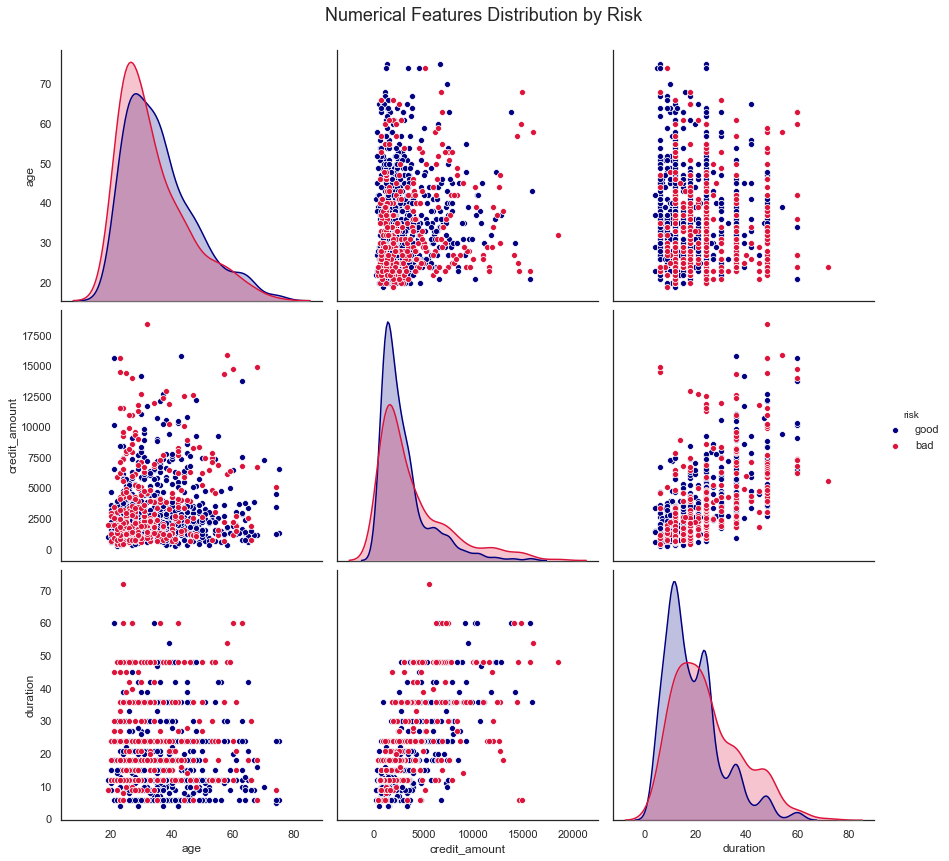

In [44]:
cols_pairplot_analyis = ['age', 'credit_amount', 'duration', 'risk']
df_pairplot = df.loc[:, cols_pairplot_analyis]
custom_colors = ["navy", "crimson"]
ax = sns.pairplot(data=df_pairplot, hue='risk', palette=custom_colors, height=4);
fig = ax.fig
fig.suptitle('Numerical Features Distribution by Risk', size=18)
plt.subplots_adjust(top=.93)
plt.show()

NameError: name 'categorical_plot' is not defined

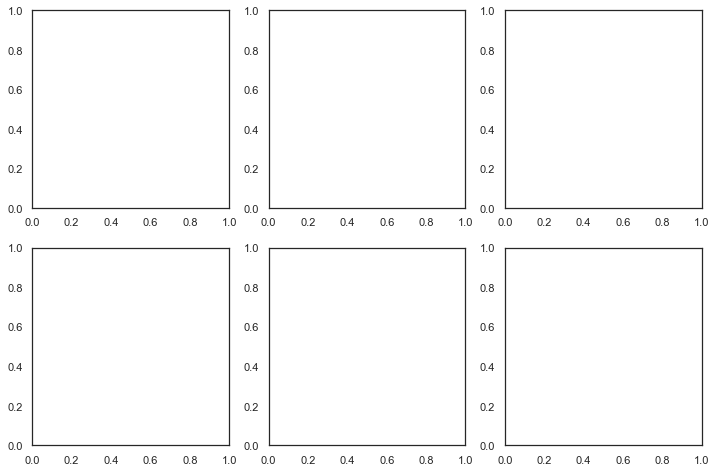

In [45]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
cols_cat = ['sex', 'housing', 'saving_accounts', 'checking_account',
            'purpose', 'risk']
categorical_plot(cols_cat, axs, df=df)
plt.tight_layout()
fig.suptitle('Categorial Features Counting', size=18)
plt.subplots_adjust(top=.88)

In [48]:
fig = plt.figure(constrained_layout=True, figsize=(12, 8))
gs = GridSpec(2, 2, figure=fig, width_ratios=[10,10], height_ratios=[2, 2])

# Configuring grid spec axis
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# purpose by risk
purpose_to_risk = pd.crosstab(df['purpose'], df['risk'])
purpose_to_risk.div(purpose_to_risk.sum(1).astype(float), axis=0).plot(kind='barh', 
                                                                       stacked=True, ax=ax1, 

colors=['crimson', 'navy']
format_spines(ax1, right_border=False)
ax1.set_title('Purpose and Risk Relationship')

# housing by risk
housing_to_risk = pd.crosstab(df['housing'], df['risk'])
housing_to_risk.div(housing_to_risk.sum(1).astype(float), axis=0).plot(kind='bar', 
                                                                       stacked=True, ax=ax2, 
                                                                       colors=['crimson', 'navy'], legend=None)
format_spines(ax2, right_border=False)
ax2.set_title('Housing and Risk Relationship')
for tick in ax2.get_xticklabels():
    tick.set_rotation(0)

# gender by risk
gender_to_risk = pd.crosstab(df['sex'], df['risk'])
gender_to_risk.div(gender_to_risk.sum(1).astype(float), axis=0).plot(kind='bar', 
                                                                       stacked=True, ax=ax3, 
                                                                       colors=['crimson', 'navy'], legend=None)
format_spines(ax3, right_border=False)
ax3.set_title('Gender and Risk Relationship')
for tick in ax3.get_xticklabels():
    tick.set_rotation(0)

fig.align_labels()
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-48-6b1c612a0b8a>, line 15)